# Initial Set Up

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import the time series Data

In [4]:
data = pd.read_csv('airline-passenger-traffic.csv', header=None)
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')

In [5]:
train_len = 120
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [6]:
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


#Time Series Analysis

### Plot the data

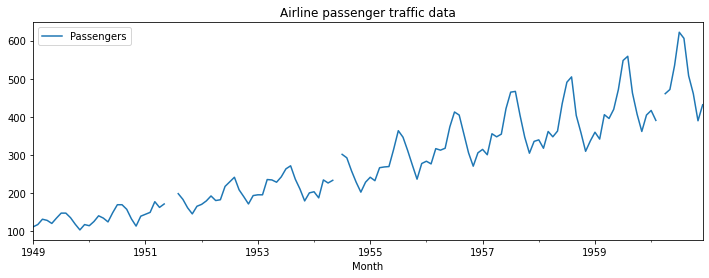

In [7]:
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline passenger traffic data')
plt.show(block=False)

### Missing Values in the data

1. Mean Imputation

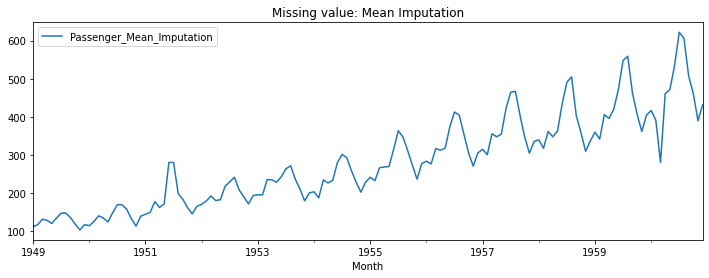

In [8]:
data = data.assign(Passenger_Mean_Imputation = data.Passengers.fillna(data.Passengers.mean()))
data['Passenger_Mean_Imputation'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing value: Mean Imputation')
plt.show(block=False)

2. Linear Interpolation

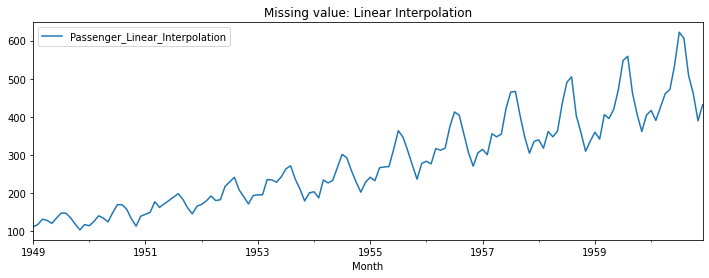

In [9]:
data = data.assign(Passenger_Linear_Interpolation = data.Passengers.interpolate(method='linear'))
data['Passenger_Linear_Interpolation'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing value: Linear Interpolation')
plt.show(block=False)

In [10]:
data['Passengers'] = data['Passenger_Linear_Interpolation']

In [11]:
# new_data = pd.read_csv('Metrail+dataset.csv')
# #new_data['Travellers'] = new_data['Travellers(\'000)']
# new_data = new_data.rename(columns={'Travellers(\'000)':'Travellers'})
# new_data.head()

In [12]:
# new_data['New_Travellers'] = new_data['Travellers'].interpolate(method='linear')

In [13]:
# new_data['New_Travellers'].mean()

In [14]:
#df['Age'] = df['Age'].fillna(method='bfill')

# Outlier Detection

In [15]:
import seaborn as sns

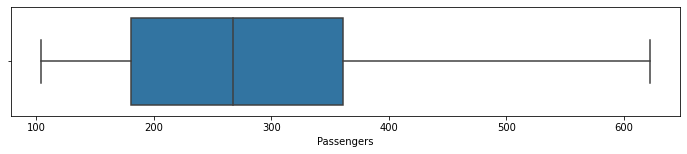

In [16]:
plt.figure(figsize=(12,2))
sns.boxplot(data['Passengers'], whis=1.5)
plt.show()

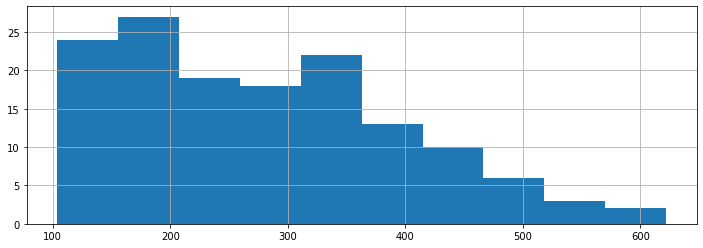

In [17]:
data['Passengers'].hist(figsize=(12,4))

# Time Series Decomposition

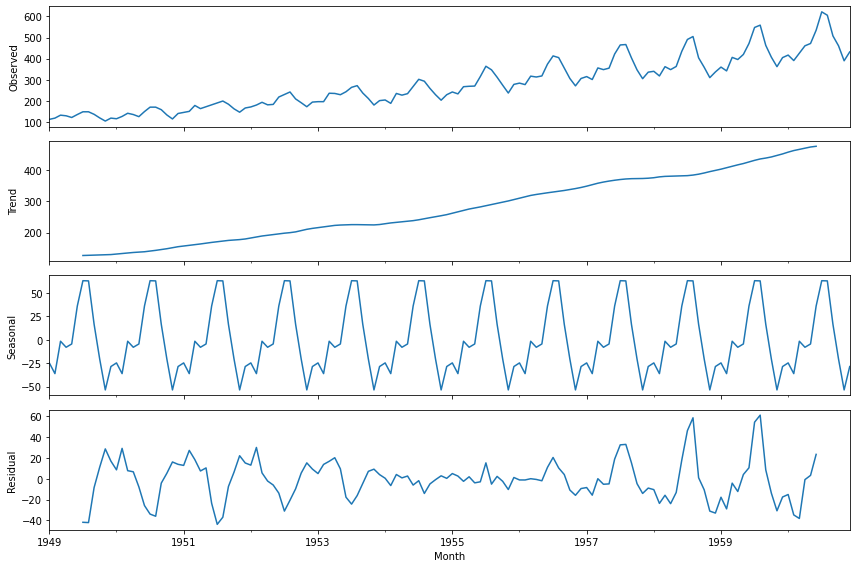

In [18]:
### Additive Seasonal Decomposition

from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive')
fig=decomposition.plot()
plt.show()

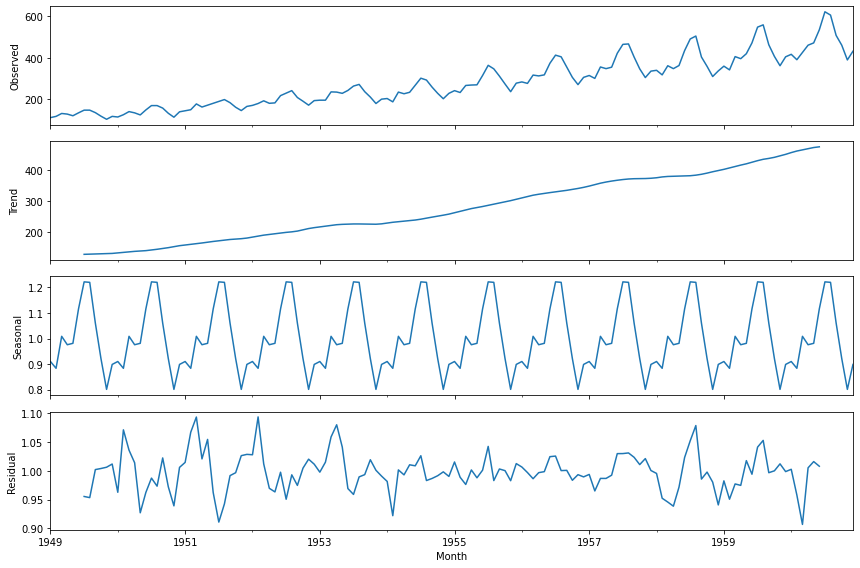

In [19]:
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative')
fig=decomposition.plot()
plt.show()

# Autoregression Model

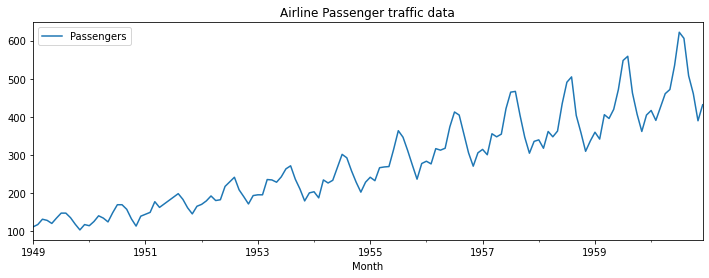

In [20]:
data['Passengers'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger traffic data')
plt.show()

##### Augmented Dickey-Fuller Test(ADF Test)

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
adf_test = adfuller(data['Passengers'])

In [23]:
print('ADF statistics %f' % adf_test[0])

ADF statistics 0.894609


In [24]:
print('Critical value @0.05 %.2f' % adf_test[4]['5%'])

Critical value @0.05 -2.88


In [25]:
print('p value %f' % adf_test[1])

p value 0.993020


### KPSS test

In [26]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Passengers'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [27]:
print('KPSS statistics %f' % kpss_test[0])

KPSS statistics 1.052050


In [28]:
print('Critical value @0.05 %.2f' % kpss_test[3]['5%'])
print('p value %f' % kpss_test[1])

Critical value @0.05 0.46
p value 0.010000


## Box Cox Transformation

In [29]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda=0),index=data.index)

Text(0.5, 1.0, 'After Box Cox Transformation')

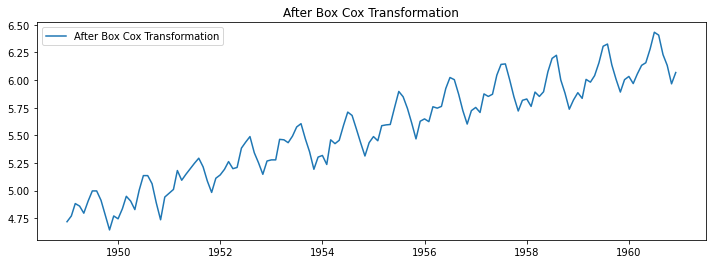

In [30]:
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.title('After Box Cox Transformation')

## Differencing

In [31]:
data_boxcox_diff = pd.Series(data_boxcox-data_boxcox.shift(), index=data.index)

In [32]:
data_boxcox_diff

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Length: 144, dtype: float64

In [33]:
data_boxcox_diff.dropna(inplace=True)

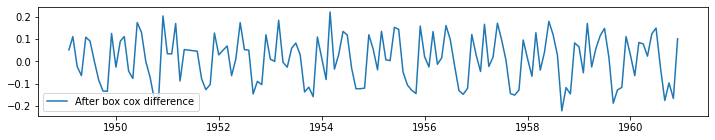

In [34]:
plt.figure(figsize=(12,2))
plt.plot(data_boxcox_diff, label='After box cox difference')
plt.legend(loc='best')
plt.show()

In [35]:
adf_test_trans = adfuller(data_boxcox_diff)

In [36]:
adf_test_trans[0]

-3.290113818459391

In [37]:
adf_test_trans[4]['5%']

-2.8840418343195267

In [38]:
adf_test_trans[1]

0.015326212237945417

In [39]:
from statsmodels.tsa.stattools import kpss
kpss_test_trans = kpss(data_boxcox_diff)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [40]:
print('KPSS statistics %f' % kpss_test_trans[0])

KPSS statistics 0.101871


In [41]:
print('Critical value @0.05 %.2f' % kpss_test_trans[3]['5%'])
print('p value %f' % kpss_test_trans[1])

Critical value @0.05 0.46
p value 0.100000


## Aucorrelation Plots

In [42]:
from statsmodels.graphics.tsaplots import plot_acf

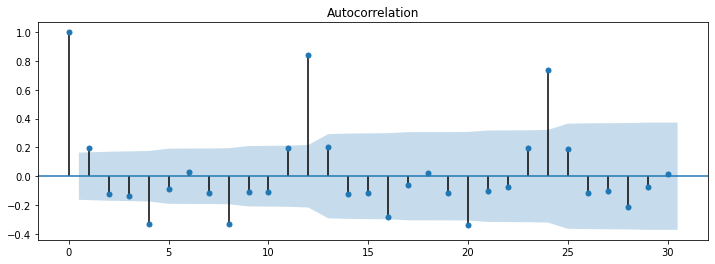

In [43]:
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

## Partial Autocolrelation Plots

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf

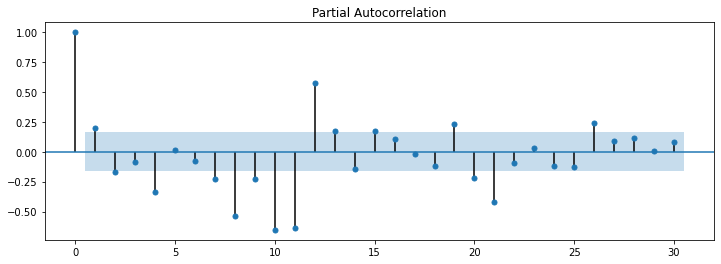

In [45]:
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

## Split into training and test data sets

In [46]:
train_len=120
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## Auto Regression Method (AR

In [47]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [48]:
print(model_fit.params)

const      0.009477
ar.L1.y    0.183116
dtype: float64


## Recover original time series forecast

In [49]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

## Plot train test and forecast data

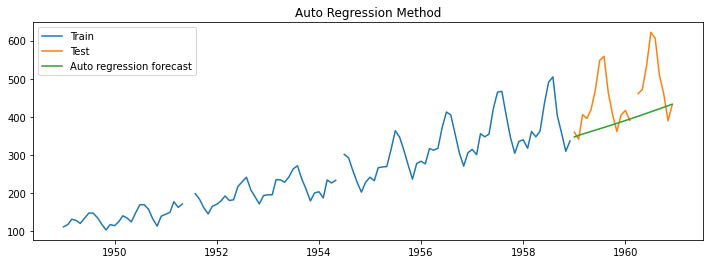

In [50]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

## Moving Average Method

In [51]:
model_ma = ARIMA(train_data_boxcox_diff, order=(0,0,1))
model_fit_ma = model_ma.fit()
print(model_fit_ma.params)

const      0.009538
ma.L1.y    0.266103
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [52]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit_ma.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

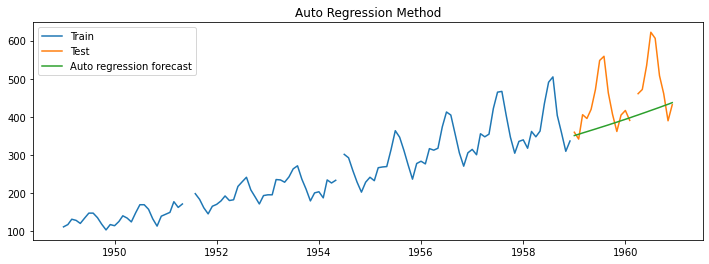

In [53]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

## Graded Questions

In [58]:
unrate = pd.read_csv('UNRATE.csv', header=None)

In [60]:
unrate.columns = ['Date', 'Ratings']

In [61]:
unrate.head()

,Date,Ratings
0,01-01-1948,3.4
1,01-02-1948,3.8
2,01-03-1948,4.0
3,01-04-1948,3.9
4,01-05-1948,3.5


In [66]:
unrate['Date'] = pd.to_datetime(unrate['Date'], format='%d-%m-%Y')

In [68]:
train_len_unread = 612
train_unread = unrate[0:train_len_unread] # first 120 months as training set
test_unread = unrate[train_len_unread:] # last 24 months as out-of-time test set

In [70]:
unrate.shape

(867, 2)

In [72]:
unrate_boxcox = pd.Series(boxcox(unrate['Ratings'], lmbda=0),index=unrate.index)

Text(0.5, 1.0, 'After Box Cox Transformation')

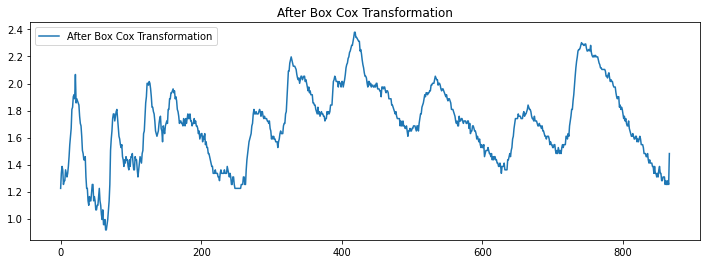

In [73]:
plt.figure(figsize=(12,4))
plt.plot(unrate_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.title('After Box Cox Transformation')

In [75]:
unrate_boxcox_diff = pd.Series(unrate_boxcox-unrate_boxcox.shift(), index=unrate.index)

In [76]:
unrate_boxcox_diff.head()

0         NaN
1    0.111226
2    0.051293
3   -0.025318
4   -0.108214
dtype: float64

In [78]:
unrate_boxcox_diff.dropna(inplace=True)

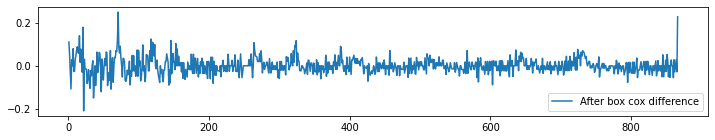

In [79]:
plt.figure(figsize=(12,2))
plt.plot(unrate_boxcox_diff, label='After box cox difference')
plt.legend(loc='best')
plt.show()

In [80]:
train_unrate_boxcox = unrate_boxcox[:train_len_unread]
test_unrate_boxcox = unrate_boxcox[train_len_unread:]
train_unrate_boxcox_diff = unrate_boxcox_diff[:train_len_unread-1]
test_unrate_boxcox_diff = unrate_boxcox_diff[train_len_unread-1:]

In [81]:
model_1 = ARIMA(train_unrate_boxcox_diff, order=(1,0,0))
model_fit_1 = model_1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [82]:
model_fit_1.params

const      0.000450
ar.L1.y    0.135514
dtype: float64

In [84]:
y_hat_ar_1 = unrate_boxcox_diff.copy()
y_hat_ar_1['ar_forecast_boxcox_diff'] = model_fit_1.predict(unrate_boxcox_diff.index.min(),unrate_boxcox_diff.index.max())
y_hat_ar_1['ar_forecast_boxcox'] = y_hat_ar_1['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar_1['ar_forecast_boxcox'] = y_hat_ar_1['ar_forecast_boxcox'].add(unrate_boxcox[0])
y_hat_ar_1['ar_forecast'] = np.exp(y_hat_ar_1['ar_forecast_boxcox'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Moving Average

In [85]:
model_ma_1 = ARIMA(train_data_boxcox_diff, order=(0,0,1))
model_fit_ma_1 = model_ma_1.fit()
print(model_fit_ma_1.params)

const      0.009538
ma.L1.y    0.266103
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
